In [27]:
import sys
sys.path.insert(0, '../code/functions/')
import plotly
plotly.offline.init_notebook_mode()
import neuroGraphLib as ngLib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [116]:
def adaptiveThreshold(inImg, sx, sy):
    outImg = np.zeros_like(inImg)
    shape = outImg.shape
    sz = shape[0]
    subzLen = shape[0]/sz
    subYLen = shape[1]/sy
    subxLen = shape[2]/sx
    averages = []
    for zInc in range(1, sz + 1):
        for yInc in range(1, sy + 1):
            for xInc in range(1, sx + 1):
                sub = inImg[(zInc-1)*subzLen: zInc*subzLen, (yInc-1)*subYLen: yInc*subYLen, (xInc-1)*subxLen: xInc*subxLen]
                averages.append(np.mean(sub))
    mean = np.mean(averages)
    std = np.std(averages)
    for zInc in range(1, sz + 1):
        for yInc in range(1, sy + 1):
            for xInc in range(1, sx + 1):
                sub = inImg[(zInc-1)*subzLen: zInc*subzLen, (yInc-1)*subYLen: yInc*subYLen, (xInc-1)*subxLen: xInc*subxLen]
                percentile = 95 - 20 * (np.mean(sub) - mean)/std
                if percentile > 100:
                    percentile = 100
                if percentile < 0:
                    percentile = 0
                subThresh = binaryThreshold(sub, percentile)
                outImg[(zInc-1)*subzLen: zInc*subzLen, (yInc-1)*subYLen: yInc*subYLen, (xInc-1)*subxLen: xInc*subxLen] = subThresh
    return outImg/256

def binaryThreshold(img, percentile=80):
    img = (256*img).astype('uint8')
    threshImg = np.zeros_like(img)
    percentile = np.percentile(img, percentile)
    for i in range(len(img)):
        threshImg[i] = cv2.threshold(img[i], percentile, 255, cv2.THRESH_TOZERO)[1]
    return threshImg


In [6]:
tp2 = loadTiff('../../data/newData/rr46b_s0_ch1.tif')[13:16]
tp3 = loadTiff('../../data/newData/rr46b_s1_ch1.tif')

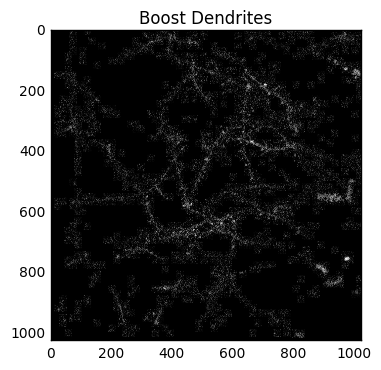

In [104]:
dendrites, _ = ngLib.boostDendrites(tp2, percentile = 50)
plt.imshow(dendrites[2], cmap='gray')
plt.title('Boost Dendrites')
plt.show()

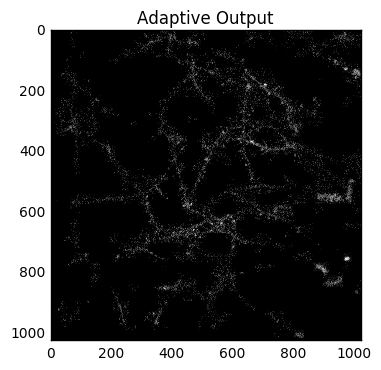

In [117]:
adaptive = adaptiveThreshold(dendrites, 32, 32)
plt.imshow(adaptive[2], cmap='gray')
plt.title('Adaptive Output')
plt.show()

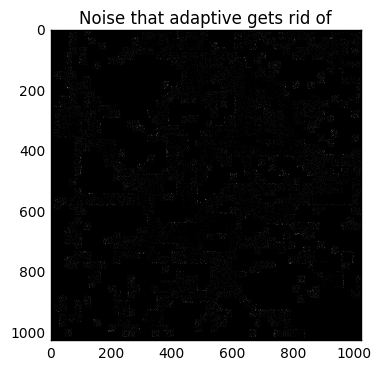

In [113]:
plt.imshow( dendrites[2] - adaptive[2], cmap='gray')
plt.title('Noise that adaptive gets rid of')
plt.show()

2


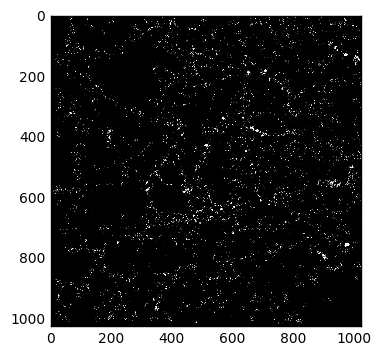

4


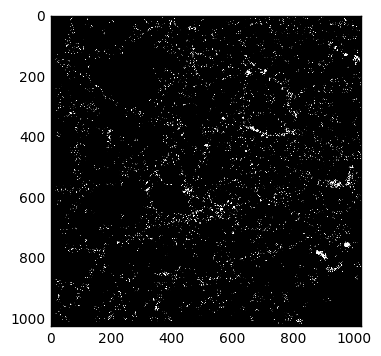

6


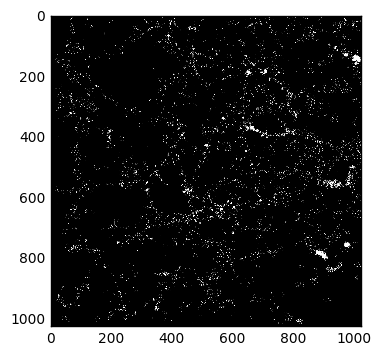

8


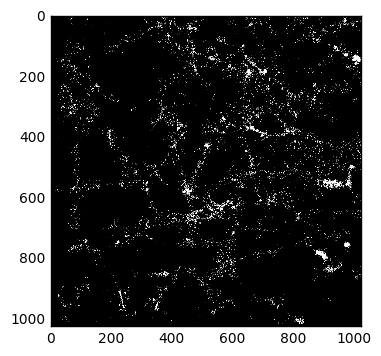

10


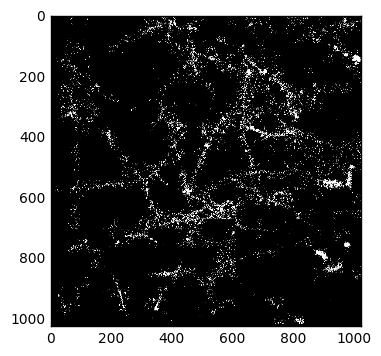

12


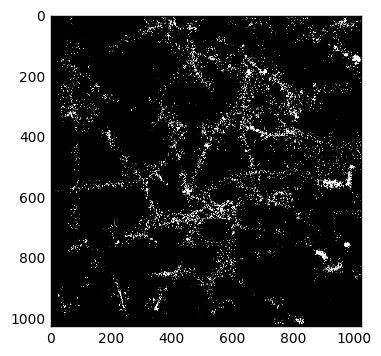

14


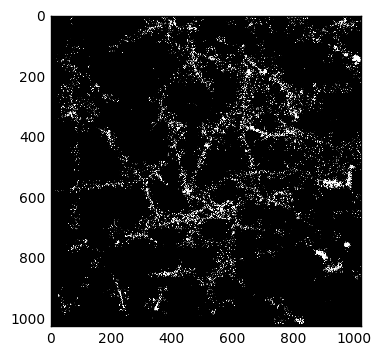

16


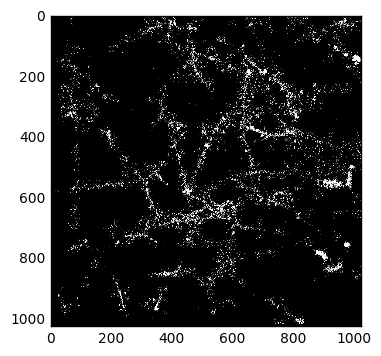

18


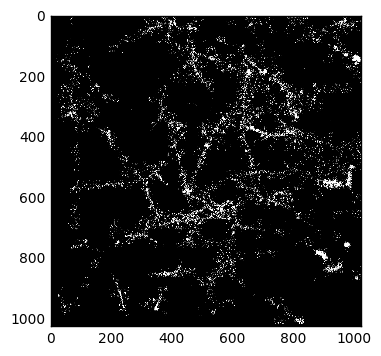

20


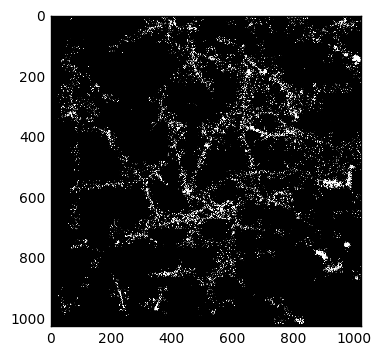

In [132]:
for i in range(10):
    print 2 * (i+1)
    adaptive = adaptiveThreshold(axons, 32, 32, 2 * (i+1))
    plt.imshow(adaptive[2], cmap='gray')
    plt.show()

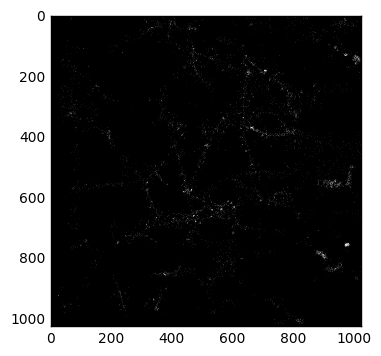

In [140]:
adaptive = adaptiveThreshold(axons, 32, 32)
plt.imshow(adaptive[2], cmap='gray')
plt.show()